In [2]:
import numpy as np

data = np.load('data.npy')
target = np.load('target.npy')

#Menyimpan Numpy Array dari source code sebelumnya

In [3]:
from keras.models import Sequential 
from keras.layers import Dense, Activation, Flatten, Dropout
from keras.layers import Conv2D, MaxPooling2D
from keras.callbacks import ModelCheckpoint

model = Sequential()

model.add(Conv2D(200,(3,3), input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#CNN Layer Pertama menggunakan activasi relu dan maxpooling layer

model.add(Conv2D(100,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#CNN Layer Kedua menggunakan conv2d, activation relu, dan maxpooling2d

model.add(Flatten())
model.add(Dropout(0.5))
#Layer Flatten
model.add(Dense(50,activation='relu'))
#Dense layer of 64 neurons
model.add(Dense(2,activation='softmax'))
#Final layer menggunakan 2 output kategori

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 200)       2000      
                                                                 
 activation (Activation)     (None, 98, 98, 200)       0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 200)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 100)       180100    
                                                                 
 activation_1 (Activation)   (None, 47, 47, 100)       0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 23, 23, 100)      0         
 2D)                                                    

In [5]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target = train_test_split(data,target,test_size=0.1)

In [ ]:
checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')
history=model.fit(train_data,train_target,epochs=20,callbacks=[checkpoint],validation_split=0.2)

Epoch 1/20
26/26 [==============================] - 33s 1s/step - loss: 0.3674 - accuracy: 0.8707 - val_loss: 0.1831 - val_accuracy: 0.9461
Epoch 2/20
26/26 [==============================] - 32s 1s/step - loss: 0.2774 - accuracy: 0.8892 - val_loss: 0.1590 - val_accuracy: 0.9412
Epoch 3/20
26/26 [==============================] - 32s 1s/step - loss: 0.1956 - accuracy: 0.9150 - val_loss: 0.1176 - val_accuracy: 0.9657
Epoch 4/20
26/26 [==============================] - 33s 1s/step - loss: 0.1482 - accuracy: 0.9532 - val_loss: 0.1702 - val_accuracy: 0.9314
Epoch 5/20
26/26 [==============================] - 33s 1s/step - loss: 0.0865 - accuracy: 0.9704 - val_loss: 0.1957 - val_accuracy: 0.9118
Epoch 6/20
26/26 [==============================] - 33s 1s/step - loss: 0.0772 - accuracy: 0.9704 - val_loss: 0.1740 - val_accuracy: 0.9314
Epoch 7/20
26/26 [==============================] - 39s 1s/step - loss: 0.0843 - accuracy: 0.9667 - val_loss: 0.1017 - val_accuracy: 0.9608
Epoch 8/20
26/26 [==

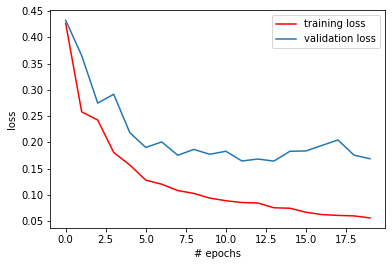

In [9]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'], 'r', label = 'training loss')
plt.plot(history.history['val_loss'], label = 'validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

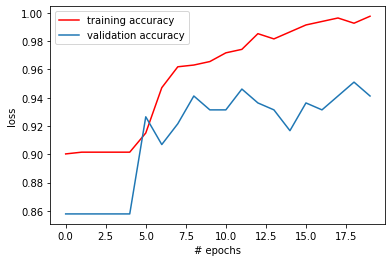

In [10]:
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [11]:
print(model.evaluate(test_data,test_target))

4/4 [==============================] - 1s 203ms/step - loss: 0.1704 - accuracy: 0.9381
[0.17044459283351898, 0.9380530714988708]
